In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
sns.set_style('darkgrid')


In [3]:
train = pd.read_csv('C:/Users/win10/Downloads/blackfriday_train.csv')
test = pd.read_csv('C:/Users/win10/Downloads/blackfriday_test.csv')

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [53]:
train.shape

(550068, 12)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### EDA

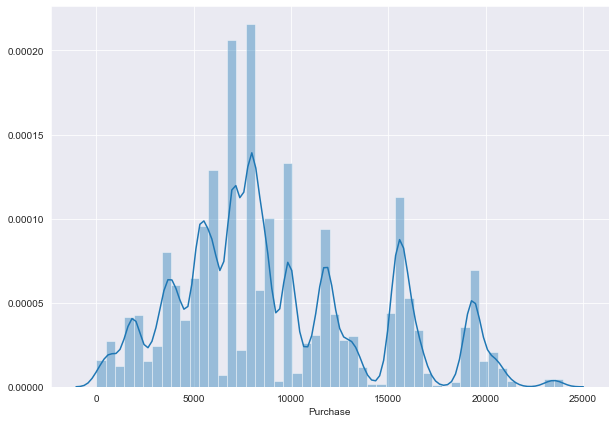

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(train['Purchase'])

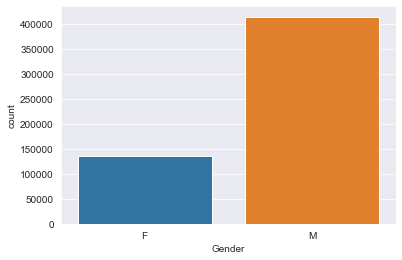

In [9]:
# distribution of gender

sns.countplot(train['Gender'])

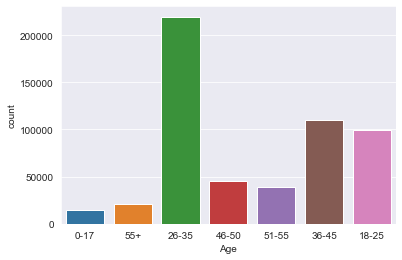

In [11]:
sns.countplot(train['Age'])

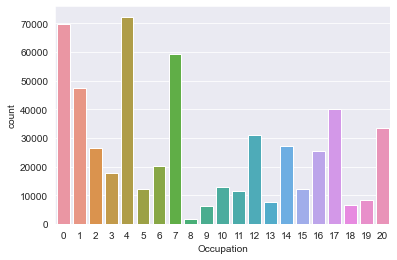

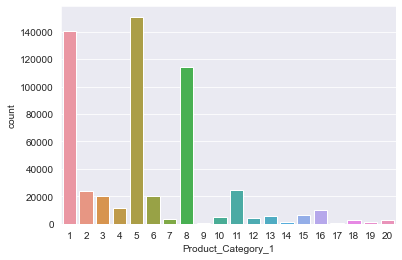

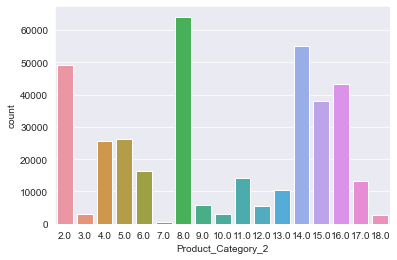

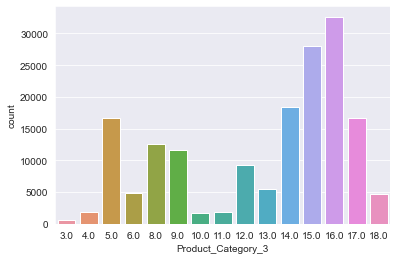

In [7]:
for col in ['Product_Category_1','Product_Category_2','Product_Category_3']:
    sns.countplot(train[col])
    plt.show()

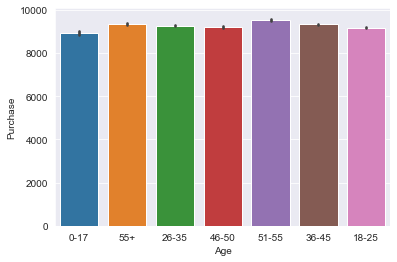

In [15]:
## Age and purchase amount

sns.barplot(train['Age'], train['Purchase'])

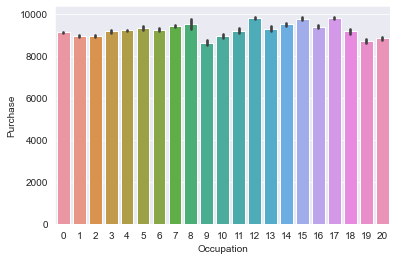

In [12]:
sns.barplot(train['Occupation'], train['Purchase'])

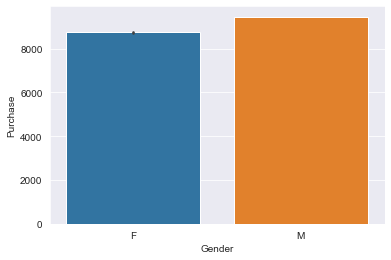

In [16]:
sns.barplot(train['Gender'], train['Purchase'])

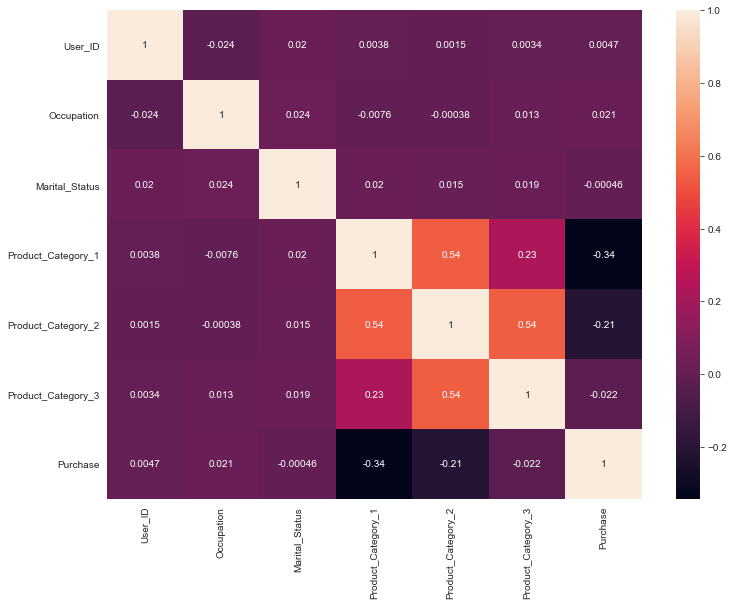

In [54]:
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(train.corr(), annot = True)

## DATA CLEANING

In [5]:
(train.isnull().sum() / len(train)) * 100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [6]:
train = train.drop('Product_Category_3',1)
test = test.drop('Product_Category_3',1)


In [7]:
random = train['Product_Category_2'].dropna().sample(train['Product_Category_2'].isnull().sum())
random.index = train[train['Product_Category_2'].isnull()]['Product_Category_2'].index
train.loc[train['Product_Category_2'].isnull(),'Product_Category_2'] = random

In [8]:
random1 = test['Product_Category_2'].dropna().sample(test['Product_Category_2'].isnull().sum())
random1.index = test[test['Product_Category_2'].isnull()]['Product_Category_2'].index
test.loc[test['Product_Category_2'].isnull(),'Product_Category_2'] = random1

In [8]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,11.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,14.0,7969


In [9]:
dictionary = {k:i for i,k in enumerate(train['Gender'].unique())}
train['Gender'] = train['Gender'].map(dictionary)
test['Gender'] = test['Gender'].map(dictionary)


In [10]:
dictionary = {k:i for i,k in enumerate(sorted(train['Age'].unique()))}
train['Age'] = train['Age'].map(dictionary)
test['Age'] = test['Age'].map(dictionary)


In [11]:
# train[['Gender','Age','Marital_Status']] = train[['Gender','Age','Marital_Status']].astype('object')
# test[['Gender','Age','Marital_Status']] = test[['Gender','Age','Marital_Status']].astype('object')

In [11]:
train = pd.get_dummies(data=train, columns=['City_Category'], drop_first=True)
test = pd.get_dummies(data=test, columns=['City_Category'], drop_first=True)


In [12]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].str.strip('+')
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].str.strip('+')

In [13]:
X = train.drop(['User_ID','Product_ID', 'Purchase'],1)
y = train['Purchase']

In [14]:
X =  X.astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      550068 non-null  category
 1   Age                         550068 non-null  category
 2   Occupation                  550068 non-null  category
 3   Stay_In_Current_City_Years  550068 non-null  category
 4   Marital_Status              550068 non-null  category
 5   Product_Category_1          550068 non-null  category
 6   Product_Category_2          550068 non-null  category
 7   City_Category_B             550068 non-null  category
 8   City_Category_C             550068 non-null  category
dtypes: category(9)
memory usage: 4.7 MB


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFECV, RFE
from sklearn.neighbors import KNeighborsRegressor

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [17]:
def feat_sel(model, X,y):
    rfecv = RFECV(estimator=model, step=1, cv=10, scoring='r2')
    rfecv.fit(X, y)
    print('Ranking: {}'.format(rfecv.ranking_))
    print('Freature Importances : {}'.format(rfecv.estimator_.feature_importances_))
    print('Optimal number of features: {}'.format(rfecv.n_features_))
    
    plt.figure(figsize=(16, 9))
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

    plt.show()


Ranking: [7 4 2 3 5 1 1 6 8]
Freature Importances : [0.99032064 0.00967936]
Optimal number of features: 2


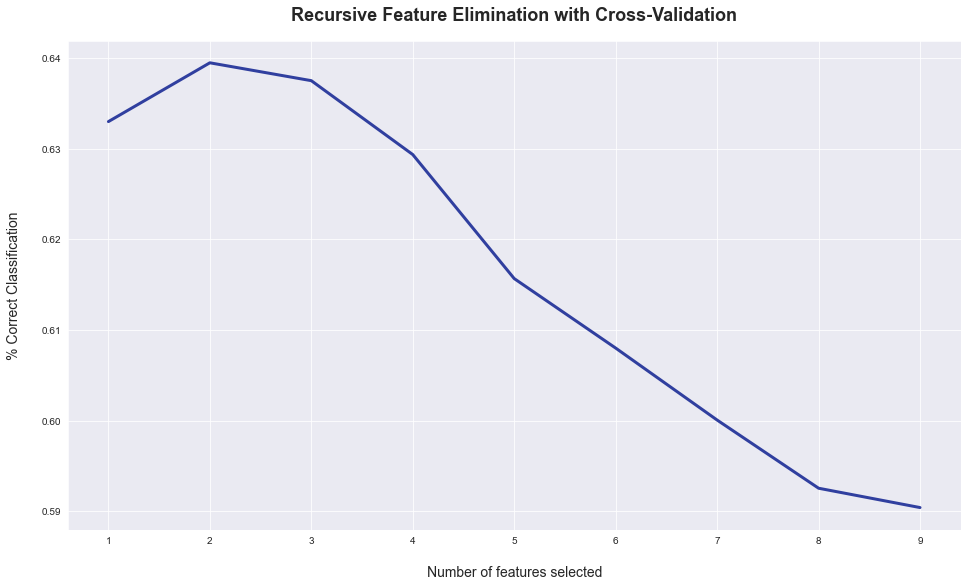

In [77]:
feat_sel(DecisionTreeRegressor(),X,y)

In [94]:
# from sklearn.feature_selection import f_classif
# sel = f_classif(X,y)
# pvalues = pd.Series(sel[1])
# pvalues.index = X.columns
# pvalues = pvalues.sort_values(ascending = True)
# pvalues[pvalues < 0.05]

In [18]:
def modl(X,y,model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # RMSE
    
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    
    # Cv
    
    cv_nmse = cross_val_score(estimator = model, X= X,y=y,cv = 5, scoring = 'neg_mean_squared_error')
    cv_rmse = np.sqrt(np.abs(cv_nmse.mean()))  
    
    # MAE
    
    mae = mean_absolute_error(y_test,y_pred)
    
    # r2
    
    r2 = r2_score(y_test, y_pred)
    
    print('RMSE for model: {}'.format(rmse))
    print('MAE for model: {}'.format(mae))
    print('CV RMSE       : {}'.format(cv_rmse))
    print('R2 score : {}'.format(r2))
    
    

In [19]:
X1 = X[['Product_Category_1','Product_Category_2']]

In [102]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
modl(X1,y, model)

RMSE for model: 4704.723805348599
MAE for model: 3593.0832499035096
CV RMSE       : 4714.065016949352
R2 score : 0.11906918866562144


In [103]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
modl(X1,y, model)

RMSE for model: 3023.6891760680387
MAE for model: 2282.702471955921
CV RMSE       : 3010.9546739637785
R2 score : 0.6361286811798574


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
model = RandomForestRegressor(n_estimators = 50, n_jobs = -1)
modl(X1,y, model)

RMSE for model: 3023.634777158023
MAE for model: 2282.6798983254757
CV RMSE       : 3010.990066625124
R2 score : 0.6361417738120159


In [105]:
model = AdaBoostRegressor()
modl(X1,y, model)

RMSE for model: 3879.78279182253
MAE for model: 3058.6224528174193
CV RMSE       : 3724.0525109158634
R2 score : 0.40091511942051783


In [106]:
model = GradientBoostingRegressor()
modl(X1,y, model)

RMSE for model: 3032.8334031412273
MAE for model: 2295.2082198055364
CV RMSE       : 3023.004659766114
R2 score : 0.633924517321301


In [20]:
criterion = ['mse', 'friedman_mse', 'mae']
max_depth = [ i for i in np.linspace(10,100,10)]
max_leaf_nodes = [2,4,6,8,10]
ccp_alpha = [i for i in np.linspace(0,1,5)]



In [21]:
grid = {'criterion':criterion,'max_depth':max_depth,'max_leaf_nodes':max_leaf_nodes,'ccp_alpha':ccp_alpha}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dt=DecisionTreeRegressor()
grid_search=RandomizedSearchCV(estimator=dt,param_distributions=grid,cv=10,n_iter = 50, n_jobs=-1,verbose=2)
grid_search.fit(X1,y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
